# Ejercicio 1

## ¿Qué es el método de Runge-Kutta y cómo aproxima las soluciones a las EDO?

-->

## ¿Cuáles son las ventajas y desventajas del método de Runge-Kutta en comparación con otros métodos numéricos para EDO? (Mencione al menos 2 ventajas y 2 desventajas)

-->

## ¿Cómo se diferencia el método de Euler y el método de Runge-Kutta?

-->

## ¿Cómo se puede aplicar el método de Euler y el método de Runge-Kutta modelos epidemiológicos y modelos de depredador-presa?

-->



# Ejercicio 2

## 2.1 - Crecimiento poblacional

Considere el modelo de crecimiento logístico dado por la ecuación diferencial:
$$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$$
Donde: \( P \) es la población en el tiempo, \( r \) es el ratio de crecimiento y \( K \) es la capacidad de carga.

Dado:
- Población inicial P0 = 10
- Ratio de crecimiento r = 0.1
- Capacidad de carga K = 1,000
- Paso del tiempo h = 0.1
- Tiempo total T = 20



Use el método de 4to orden de Runge-Kutta para estimar la población sobre el tiempo y grafique los resultados.

Interprete la gráfica y responda ¿cuál es el estimado de la población en tiempo T = 20?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parametros
P0 = 10
r = 0.1
K = 1000
h = 0.1
T = 20

In [5]:
# Definicion de la ecuacion diferencial
def f(t, P):
    return r * P * (1 - P / K)

In [6]:
# Método de Runge-Kutta de cuarto orden
def rungeKutta(P0, h, T):
    N = int(T / h)  # Número de pasos
    t_values = np.arange(0, T + h, h)
    P_values = np.zeros(len(t_values))
    
    P_values[0] = P0
    
    for i in range(N):
        t = t_values[i]
        P = P_values[i]
        
        k1 = f(t, P)
        k2 = f(t + h / 2, P + h / 2 * k1)
        k3 = f(t + h / 2, P + h / 2 * k2)
        k4 = f(t + h, P + h * k3)
        
        P_values[i + 1] = P + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_values, P_values

In [7]:
# Cálculo de los valores usando Runge-Kutta
t_values, P_values = rungeKutta(P0, h, T)


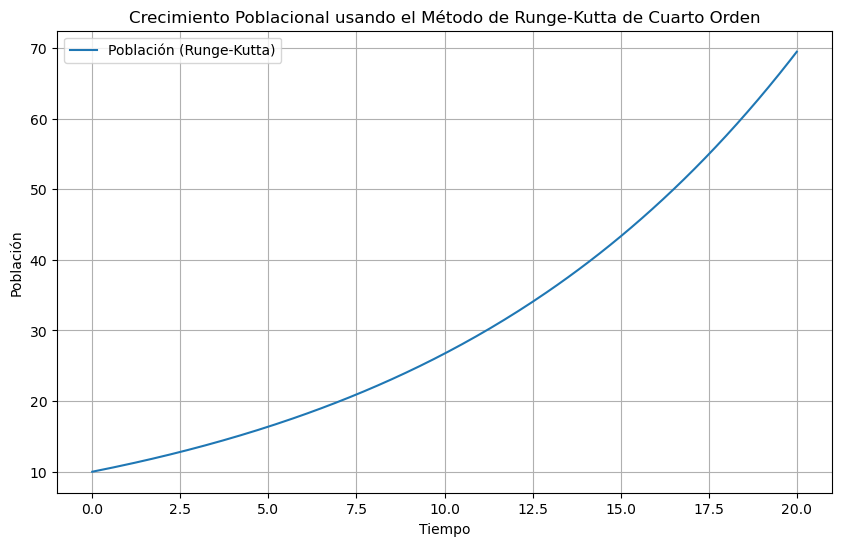

In [9]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t_values, P_values, label='Población (Runge-Kutta)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Crecimiento Poblacional usando el Método de Runge-Kutta de Cuarto Orden')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Estimado de la población en T = 20
P_estimated = P_values[-1]
P_estimated

69.45315964722215

Se estima que habrá una población de 69 individuos para tiempo T = 20.

## 2.2 - Depredador - Presa

Considere el modelo de depredador-presa de Lotka-Volterra, dado por las siguientes ecuaciones diferenciales:

$$
\frac{dR}{dt} = \alpha R - \beta RP
$$

$$
\frac{dP}{dt} = \delta RP - \gamma P
$$

Donde:
- \( R \) es la población de la presa
- \( P \) es la población de los depredadores
- \( \alpha \) es el ratio de crecimiento natural de la presa
- \( \beta \) es el coeficiente del ratio de depredación
- \( \delta \) es el ratio de reproducción de los depredadores por presa comida
- \( \gamma \) es el ratio de muerte de los depredadores

Dado:
- R0 = 40
- P0 = 9
- ɑ = 0.1
- β = 0.02
- δ = 0.01
- γ = 0.1
- Paso de tiempo h = 0.1
- Tiempo total T = 50


Utilice el método de cuarto orden de Runge-Kutta para estimar las poblaciones a lo largo del tiempo y trazar el
resultado. Interprete las gráficas y responda ¿cuál es el estimado de las poblaciones en tiempo T = 50?

In [49]:
# Parámetros del problema
R0 = 40
P0 = 9
alpha = 0.1
beta = 0.02
delta = 0.01
gamma = 0.1
h = 0.1
T = 50

In [50]:
# Funciones que definen las ecuaciones diferenciales
def dR_dt(R, P):
    return alpha * R - beta * R * P

def dP_dt(R, P):
    return delta * R * P - gamma * P

In [53]:
def rungeKutta(R0, P0, h, T):
    N = int(T / h)  # Número de pasos
    t_values = np.arange(0, T + h, h)
    R_values = np.zeros(len(t_values))
    P_values = np.zeros(len(t_values))
    
    R_values[0] = R0
    P_values[0] = P0
    
    for i in range(N):
        R = R_values[i]
        P = P_values[i]
        
        k1_R = dR_dt(R, P)
        k1_P = dP_dt(R, P)
        
        k2_R = dR_dt(R + h / 2 * k1_R, P + h / 2 * k1_P)
        k2_P = dP_dt(R + h / 2 * k1_R, P + h / 2 * k1_P)
        
        k3_R = dR_dt(R + h / 2 * k2_R, P + h / 2 * k2_P)
        k3_P = dP_dt(R + h / 2 * k2_R, P + h / 2 * k2_P)
        
        k4_R = dR_dt(R + h * k3_R, P + h * k3_P)
        k4_P = dP_dt(R + h * k3_R, P + h * k3_P)
        
        R_values[i + 1] = R + (h / 6) * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
        P_values[i + 1] = P + (h / 6) * (k1_P + 2 * k2_P + 2 * k3_P + k4_P)
    
    return t_values, R_values, P_values

In [54]:
# Cálculo de los valores usando Runge-Kutta
t_values, R_values, P_values = rungeKutta(R0, P0, h, T)

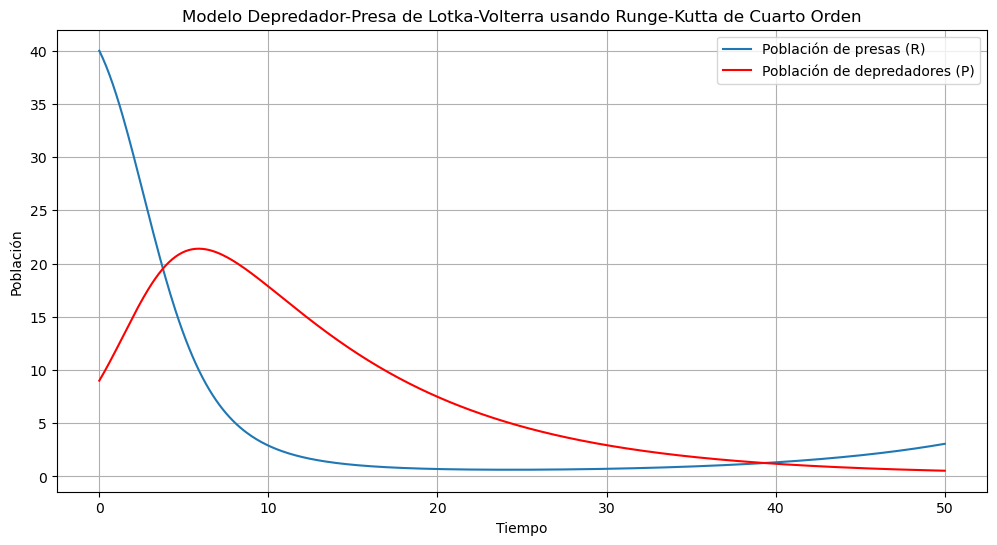

In [55]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(t_values, R_values, label='Población de presas (R)')
plt.plot(t_values, P_values, label='Población de depredadores (P)', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo Depredador-Presa de Lotka-Volterra usando Runge-Kutta de Cuarto Orden')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Estimado de las poblaciones en T = 50
R_estimated = R_values[-1]
P_estimated = P_values[-1]
R_estimated, P_estimated

(3.065794691663282, 0.5379236925658857)

Con esta aproximación, podemos observar que para un tiempo de T = 50 se tienen 3 presas y 1 depredador, debido a que se aproximan ya que no es posible tener no enteros en dichas poblaciones.